## # Project#2 : Investigate a Dataset -  ("Medical Appointments")

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
    <li><a href="#eda">Limitations</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

### Introduction

#### This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. 

## Question Researchs:

#### What is the distribution of each column?
#### How many patients who showed up vs did not show up ?
#### Is there an outlier ?
#### What is the Minimum and Maximum, Average Age ?
#### Which level has maximum number of Handcup?
#### How many patients who did rercive SMS and did not show up?
#### What is the propotion of patients who did rercive SMS and did not show?
#### What is the propotion  of patients who did not rercive SMS and did not show up!?

### Importing libraries: 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Medical Appointments dataset

In [7]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv',sep=',')

In [8]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Data Cleaning & EDA (Exploratory Data Analysis)

### Checking the shape of the dataframe

In [9]:
df.shape

(110527, 14)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [11]:
df.corr()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
PatientId,1.000000,0.004039,-0.004139,-0.002880,-0.006441,0.001605,0.011011,-0.007916,-0.009749
AppointmentID,0.004039,1.000000,-0.019126,0.022615,0.012752,0.022628,0.032944,0.014106,-0.256618
Age,-0.004139,-0.019126,1.000000,-0.092457,0.504586,0.292391,0.095811,0.078033,0.012643
Scholarship,-0.002880,0.022615,-0.092457,1.000000,-0.019729,-0.024894,0.035022,-0.008586,0.001194
Hipertension,-0.006441,0.012752,0.504586,-0.019729,1.000000,0.433086,0.087971,0.080083,-0.006267
Diabetes,0.001605,0.022628,0.292391,-0.024894,0.433086,1.000000,0.018474,0.057530,-0.014550
Alcoholism,0.011011,0.032944,0.095811,0.035022,0.087971,0.018474,1.000000,0.004648,-0.026147
Handcap,-0.007916,0.014106,0.078033,-0.008586,0.080083,0.057530,0.004648,1.000000,-0.024161
SMS_received,-0.009749,-0.256618,0.012643,0.001194,-0.006267,-0.014550,-0.026147,-0.024161,1.000000


In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PatientId,110527.0,1.474963e+14,2.560949e+14,3.921784e+04,4.172614e+12,3.173184e+13,9.439172e+13,9.999816e+14
AppointmentID,110527.0,5.675305e+06,7.129575e+04,5.030230e+06,5.640286e+06,5.680573e+06,5.725524e+06,5.790484e+06
Age,110527.0,3.708887e+01,2.311020e+01,-1.000000e+00,1.800000e+01,3.700000e+01,5.500000e+01,1.150000e+02
Scholarship,110527.0,9.826558e-02,2.976748e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Hipertension,110527.0,1.972459e-01,3.979213e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Diabetes,110527.0,7.186479e-02,2.582651e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Alcoholism,110527.0,3.039981e-02,1.716856e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Handcap,110527.0,2.224796e-02,1.615427e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
SMS_received,110527.0,3.210256e-01,4.668727e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


### Deleting the useless columns

In [13]:
df.drop('PatientId',inplace=True,axis=1)

### Setting "AppointmentID" Column as Index

In [14]:
df.set_index('AppointmentID',inplace=True)

In [15]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
AppointmentID,,,,,,,,,,,,
5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Checking Nan values

In [16]:
df[df.isna()].sum()

Gender              0
ScheduledDay        0
AppointmentDay      0
Age               0.0
Neighbourhood       0
Scholarship       0.0
Hipertension      0.0
Diabetes          0.0
Alcoholism        0.0
Handcap           0.0
SMS_received      0.0
No-show             0
dtype: object

### Checking duplicates

In [17]:
df.duplicated().sum()

635

### Removing duplicates

In [18]:
df = df.drop_duplicates()

In [19]:
df.duplicated().sum()

0

### Checking Data Types:

In [20]:
df.dtypes

Gender            object
ScheduledDay      object
AppointmentDay    object
Age                int64
Neighbourhood     object
Scholarship        int64
Hipertension       int64
Diabetes           int64
Alcoholism         int64
Handcap            int64
SMS_received       int64
No-show           object
dtype: object

### Changing Data types for "ScheduledDay" & "AppointmentDay" from string to Datetime!

In [21]:
df['ScheduledDay'] = df['ScheduledDay'].astype('datetime64')
df['AppointmentDay'] = df['AppointmentDay'].astype('datetime64')

In [22]:
df.dtypes

Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hipertension               int64
Diabetes                   int64
Alcoholism                 int64
Handcap                    int64
SMS_received               int64
No-show                   object
dtype: object

## Unique values in the data

In [23]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [24]:
df['No-show'].unique()

array(['No', 'Yes'], dtype=object)

In [25]:
df['No-show'].value_counts()

No     87794
Yes    22098
Name: No-show, dtype: int64

## EDA

## Visualizing the Unique counts

### What is the distribution of the fetures?

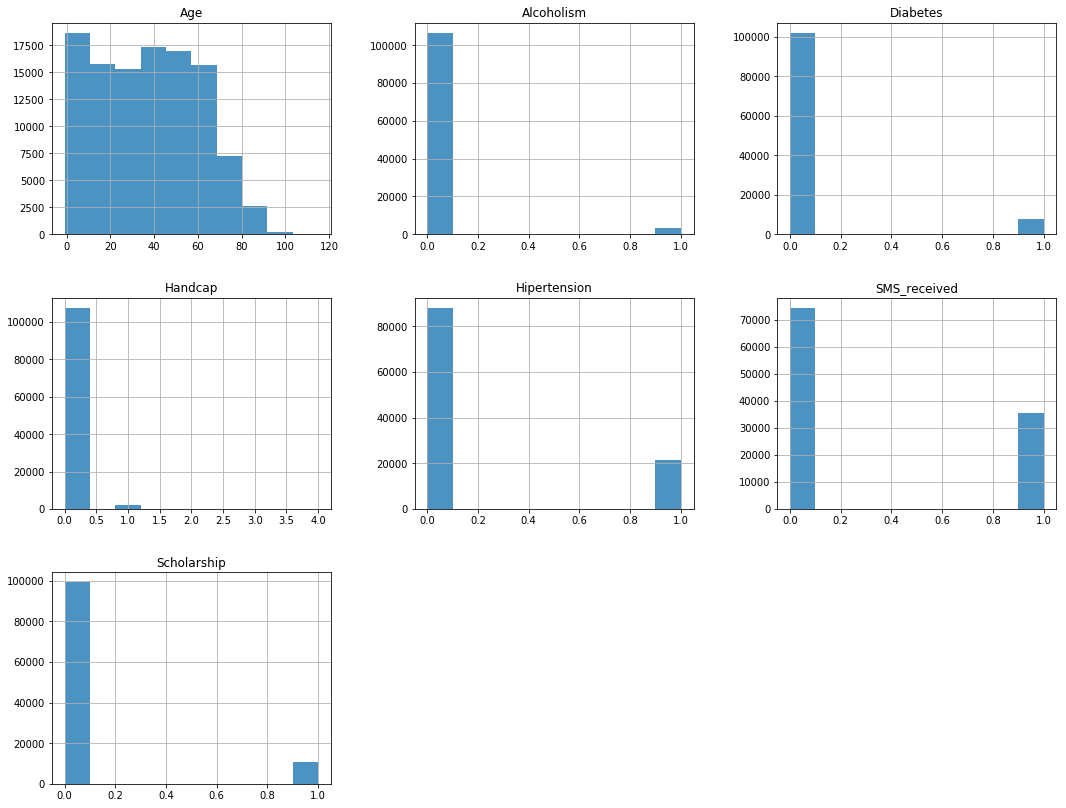

In [130]:
df.hist(figsize=(18,14),alpha=0.8);

In [26]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
AppointmentID,,,,,,,,,,,,
5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### How many patients who showed up vs did not show up ?

#### No-show vs show up!

In [131]:
df['No-show'].value_counts()

No     87794
Yes    22098
Name: No-show, dtype: int64

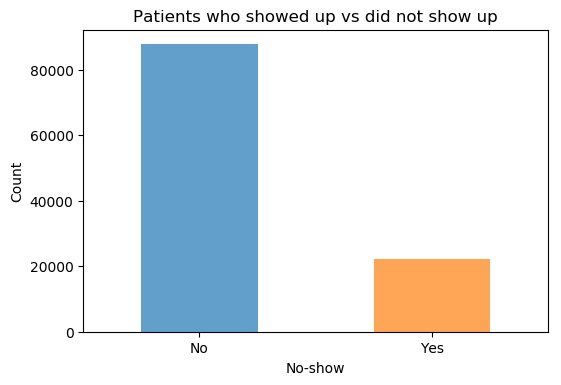

In [132]:
plt.figure(figsize=(6,4),dpi=100)
df['No-show'].value_counts().plot(kind='bar',alpha=0.7)
plt.title('Patients who showed up vs did not show up',fontsize=12)
plt.ylabel("Count");
plt.xlabel("No-show");
plt.xticks(rotation=0);

## Show up vs Did not Show up

As shown above we conclude that the patients who did not show up were about 21462, which is 20% of the whole patients.

### Is there an outlier ?

### Age Distribution

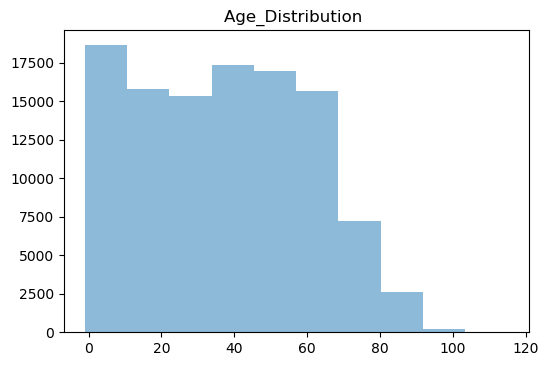

In [133]:
plt.figure(figsize=(6,4),dpi=100)

plt.hist(df['Age'],alpha=0.5)
plt.title("Age_Distribution ");

### Checking outlier "Age"!

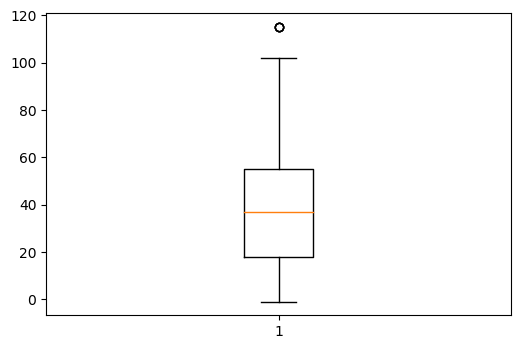

In [134]:
plt.figure(figsize=(6,4),dpi=100)

plt.boxplot(df['Age']);

### What is the Minimum and Maximum, Average Age ?

In [135]:
df['Age'].min()

-1

In [136]:
df['Age'].max()

115

In [137]:
df['Age'].mean()

37.089506060495758

## Outlier Finding:

### There is some outliers in Age column as shown above? for instance, there is a patients with Age -1. Which is incorrect data

### Removing Age under 0 OR Age with Outliers

In [138]:
df_2 = df[df['Age'] > 0].copy()

In [139]:
df_2['Age'].min()

1

In [140]:
df_2['Age'].max()

115

### Number of Rows after removing Outliers?

In [141]:
df_2.shape

(106361, 12)

### Visulaizing Age Distribution after removing outliers

The chart below is shown th distribution of pateints' age! 

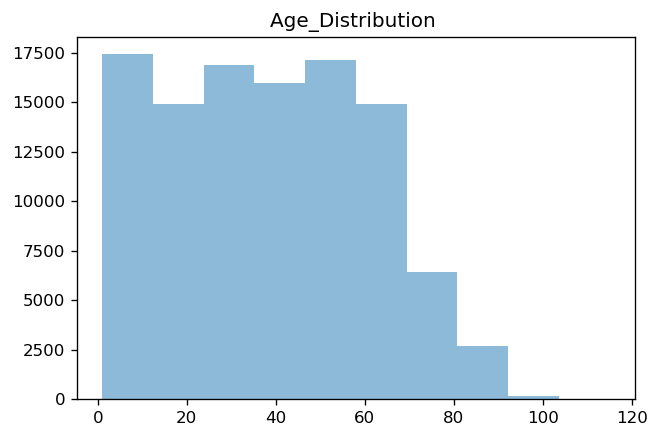

In [142]:
plt.figure(figsize=(6,4),dpi=120)
plt.title("Age_Distribution ")
plt.hist(data = df_2,x='Age',alpha=0.5);

### Which level has maximum number of Handcup?



#### Handcap Distrubition

In [143]:
df_2['Handcap'].value_counts()

0    104143
1      2022
2       182
3        11
4         3
Name: Handcap, dtype: int64

### Age

In [144]:
Did_show_up = df['No-show'] == 'No'
Did_not_show_up = df['No-show'] == 'Yes'

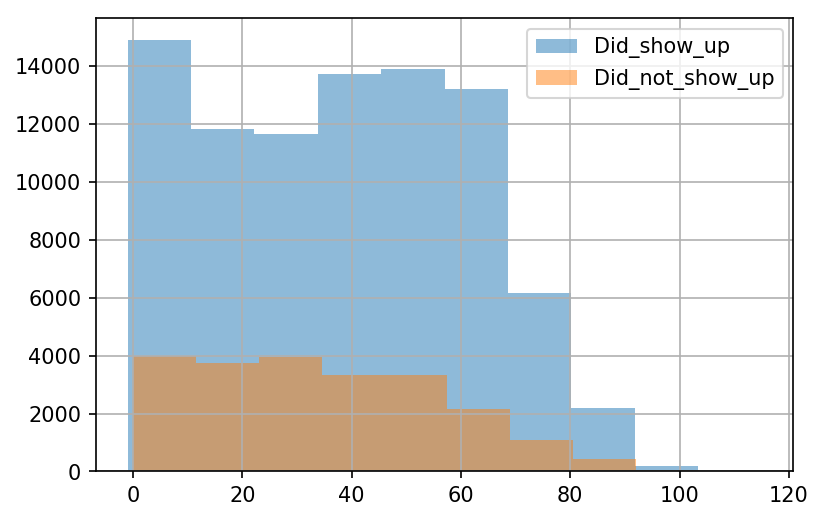

In [145]:
plt.figure(figsize=(6,4),dpi=150)
df.Age[Did_show_up].hist(alpha=0.5,label='Did_show_up')
df.Age[Did_not_show_up].hist(alpha=0.5,label='Did_not_show_up')
plt.legend();

## Age distribution of patients who show up vs did not show up!

#### As drawn above, there are different ages of patients starting from months to about 115 years old. 


In [146]:
df_2['No-show'].value_counts() 

No     84899
Yes    21462
Name: No-show, dtype: int64

In [147]:
df_2.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'SMS_received', 'No-show'],
      dtype='object')

In [148]:
feature= ['No-show','Gender',
       'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'SMS_received']

In [149]:
list(enumerate(feature))

[(0, 'No-show'),
 (1, 'Gender'),
 (2, 'Scholarship'),
 (3, 'Hipertension'),
 (4, 'Diabetes'),
 (5, 'Alcoholism'),
 (6, 'Handcap'),
 (7, 'SMS_received')]

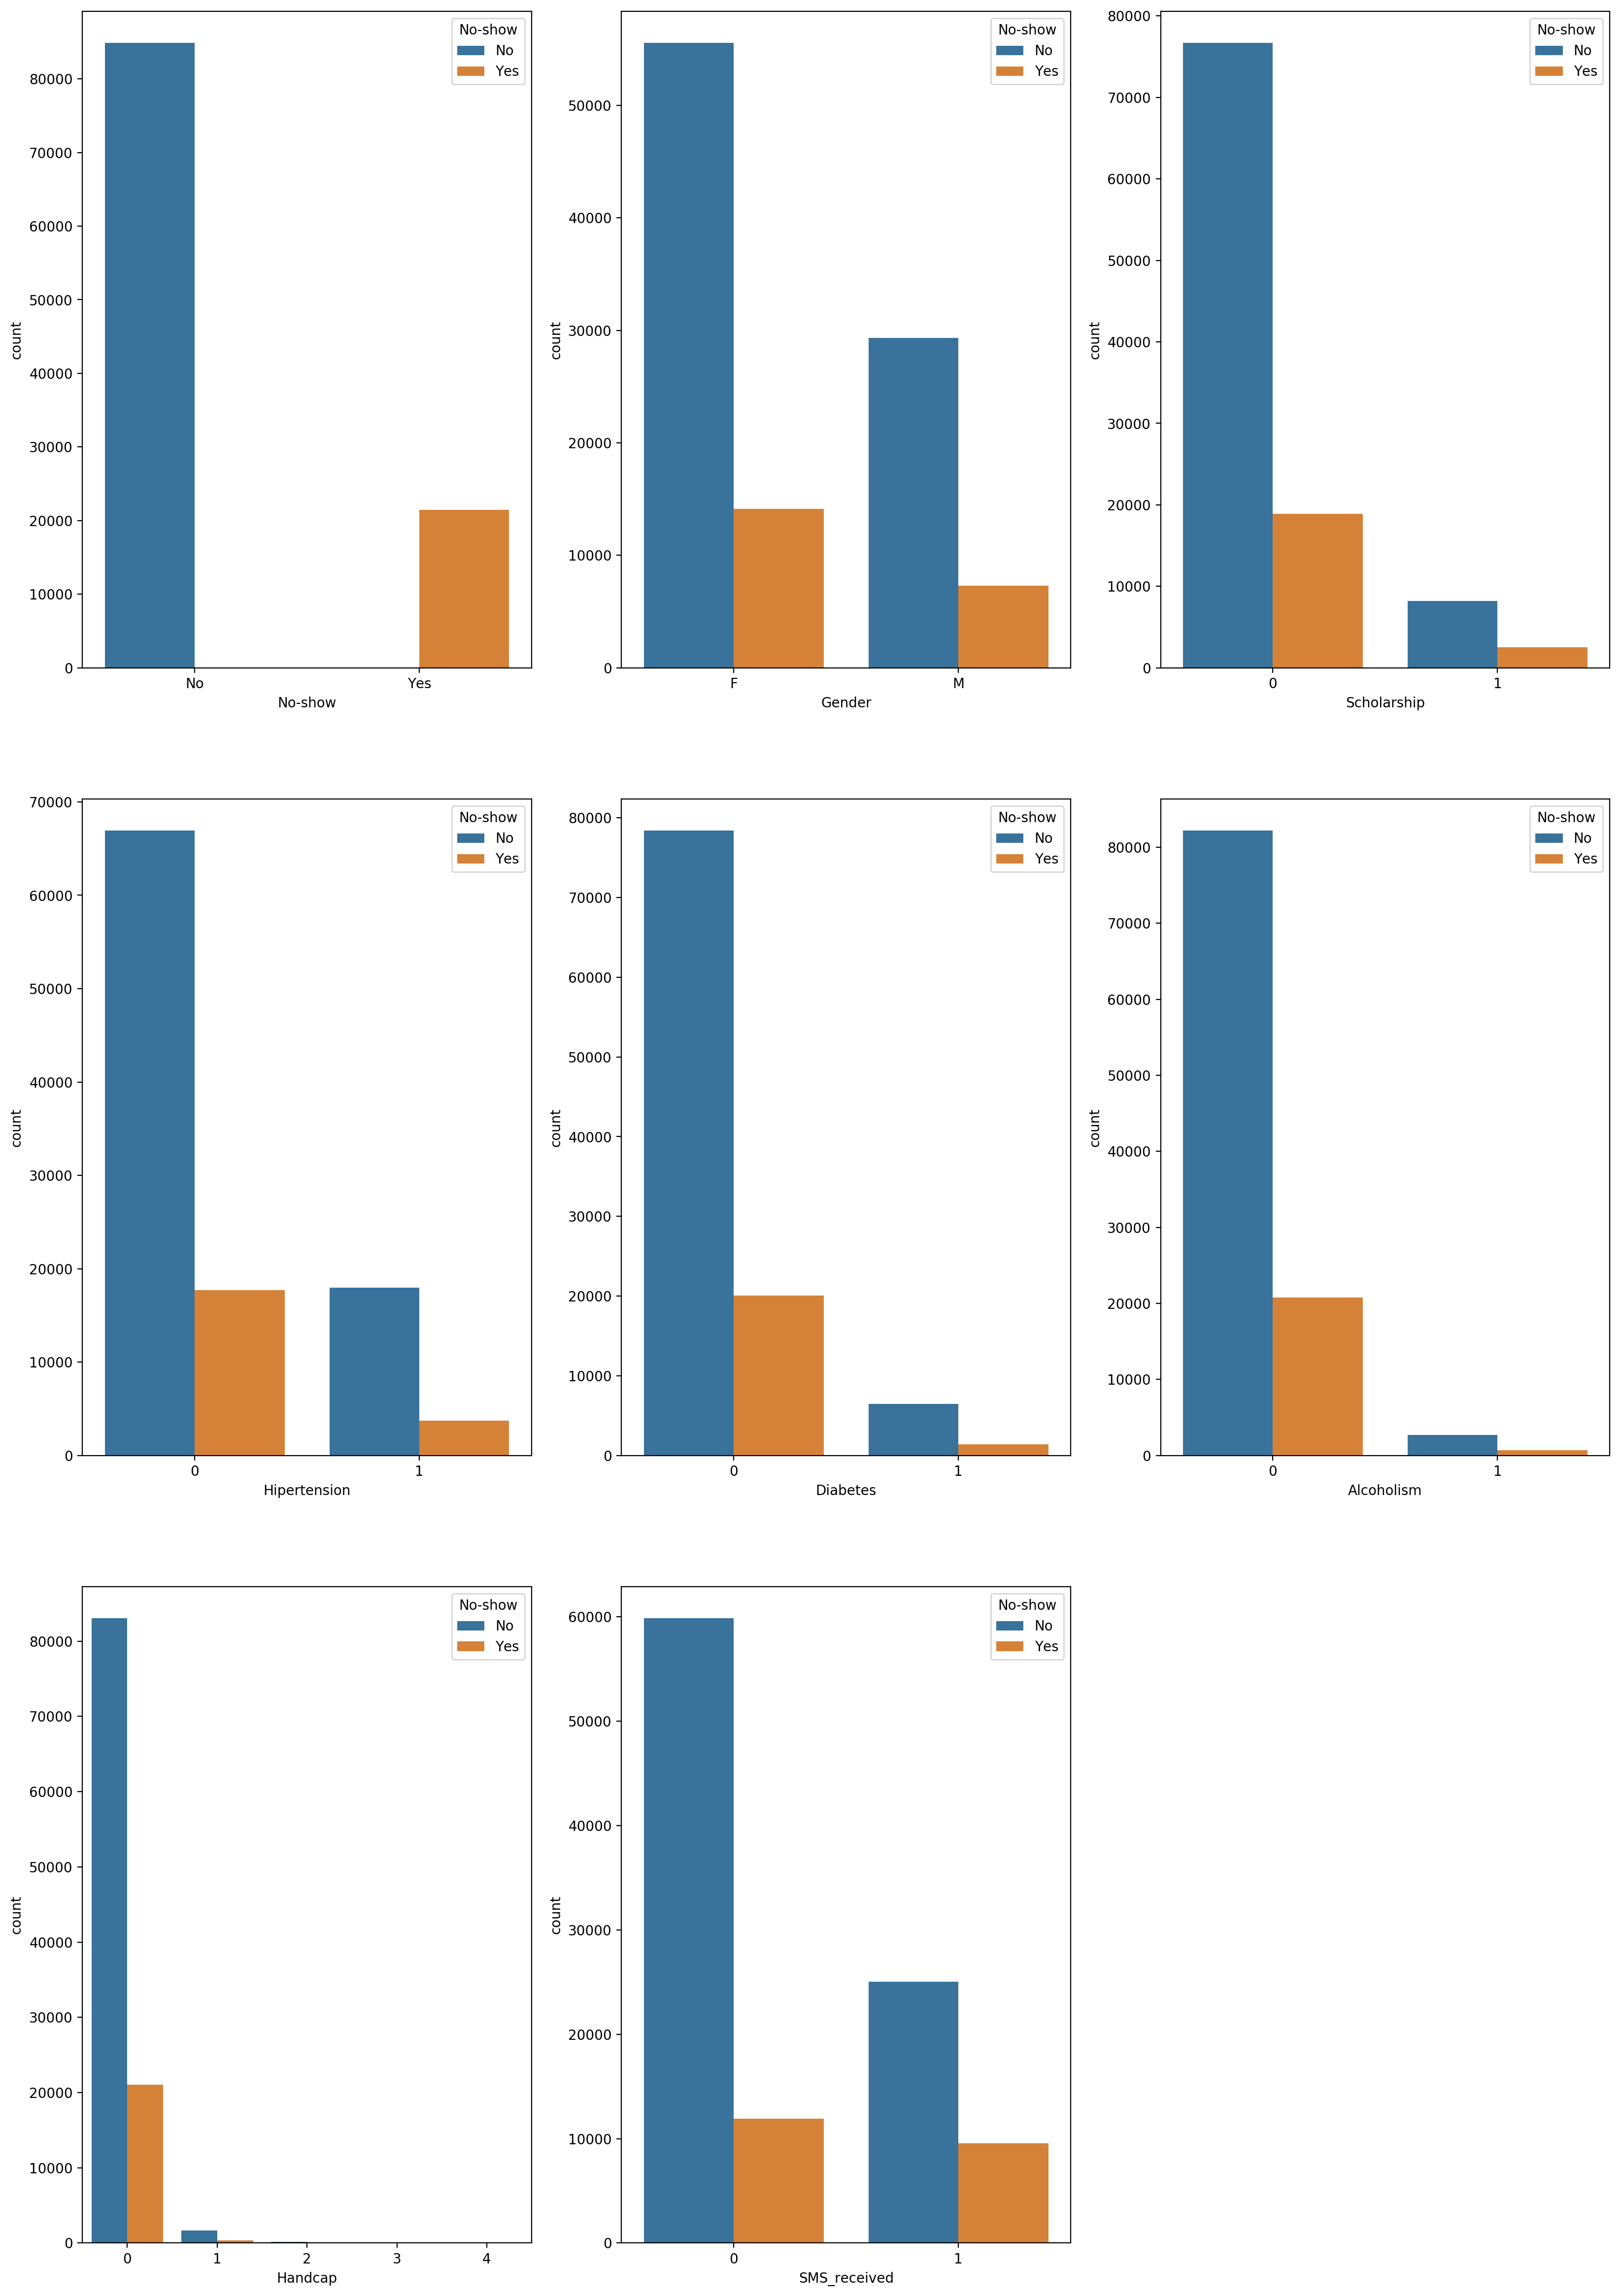

In [150]:
plt.figure(figsize=(20,30),dpi=200)
for i in enumerate(feature):
    plt.subplot(3,3,i[0] +1)
    sns.countplot(i[1], hue = 'No-show', data = df_2,saturation=0.65 )

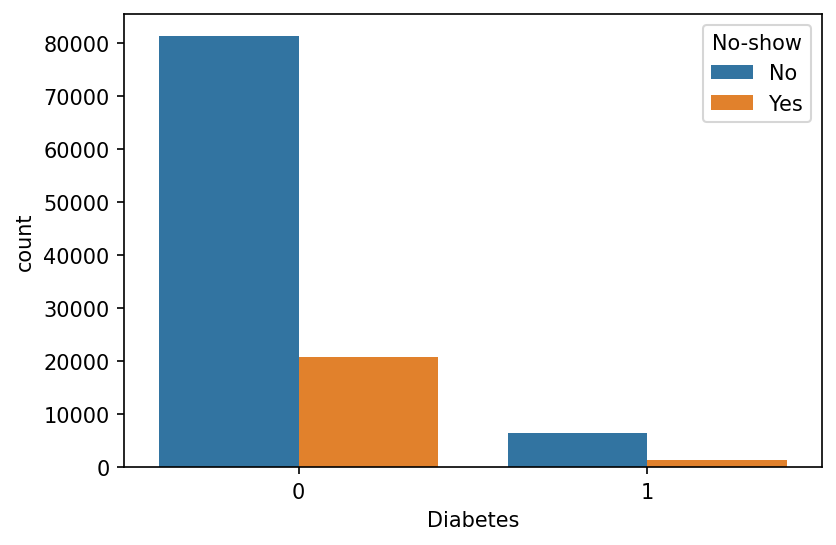

In [40]:
plt.figure(figsize=(6,4),dpi=150)
sns.countplot(df['Diabetes'], hue = 'No-show', data = df);

## Summary of Findings

## Gender Table

As shown above we conclude that most of the patients were female.And also, most of the patients who did not show up were femal.

## No-show Table

As shown above we conclude that the patients who did not show up were about 21462, which is 20% of patients.

## Gender Table

As shown above we conclude that most of the patients were female.And also, most of the patients who did not show up were femal.

## Scholarship Table

#### In Scholarship Table, we can see that patients who did not get a scholarship are higher than who did get the scholarship. And those who did not get a scholarship did not show up at the appointment compared to who did get the scholarship.

## SMS_Received Table

#### As we can see that majority of patients who did not show up at the appointment did not received SMS Message compared to patients who recieved SMS Message and showed up.

## Hipertension, Diabetes,  and Alcoholism Tables:

#### There were few patients who have had Hipertension, Diabetes, and Alcoholism and did not show up. And all those patients were men.

## Neighbourhood   -Which location has more patients who did not show up at the appointment compared to others?

#### Most of pateints who did show up at the appointment were from JARDIM CAMBURI location.

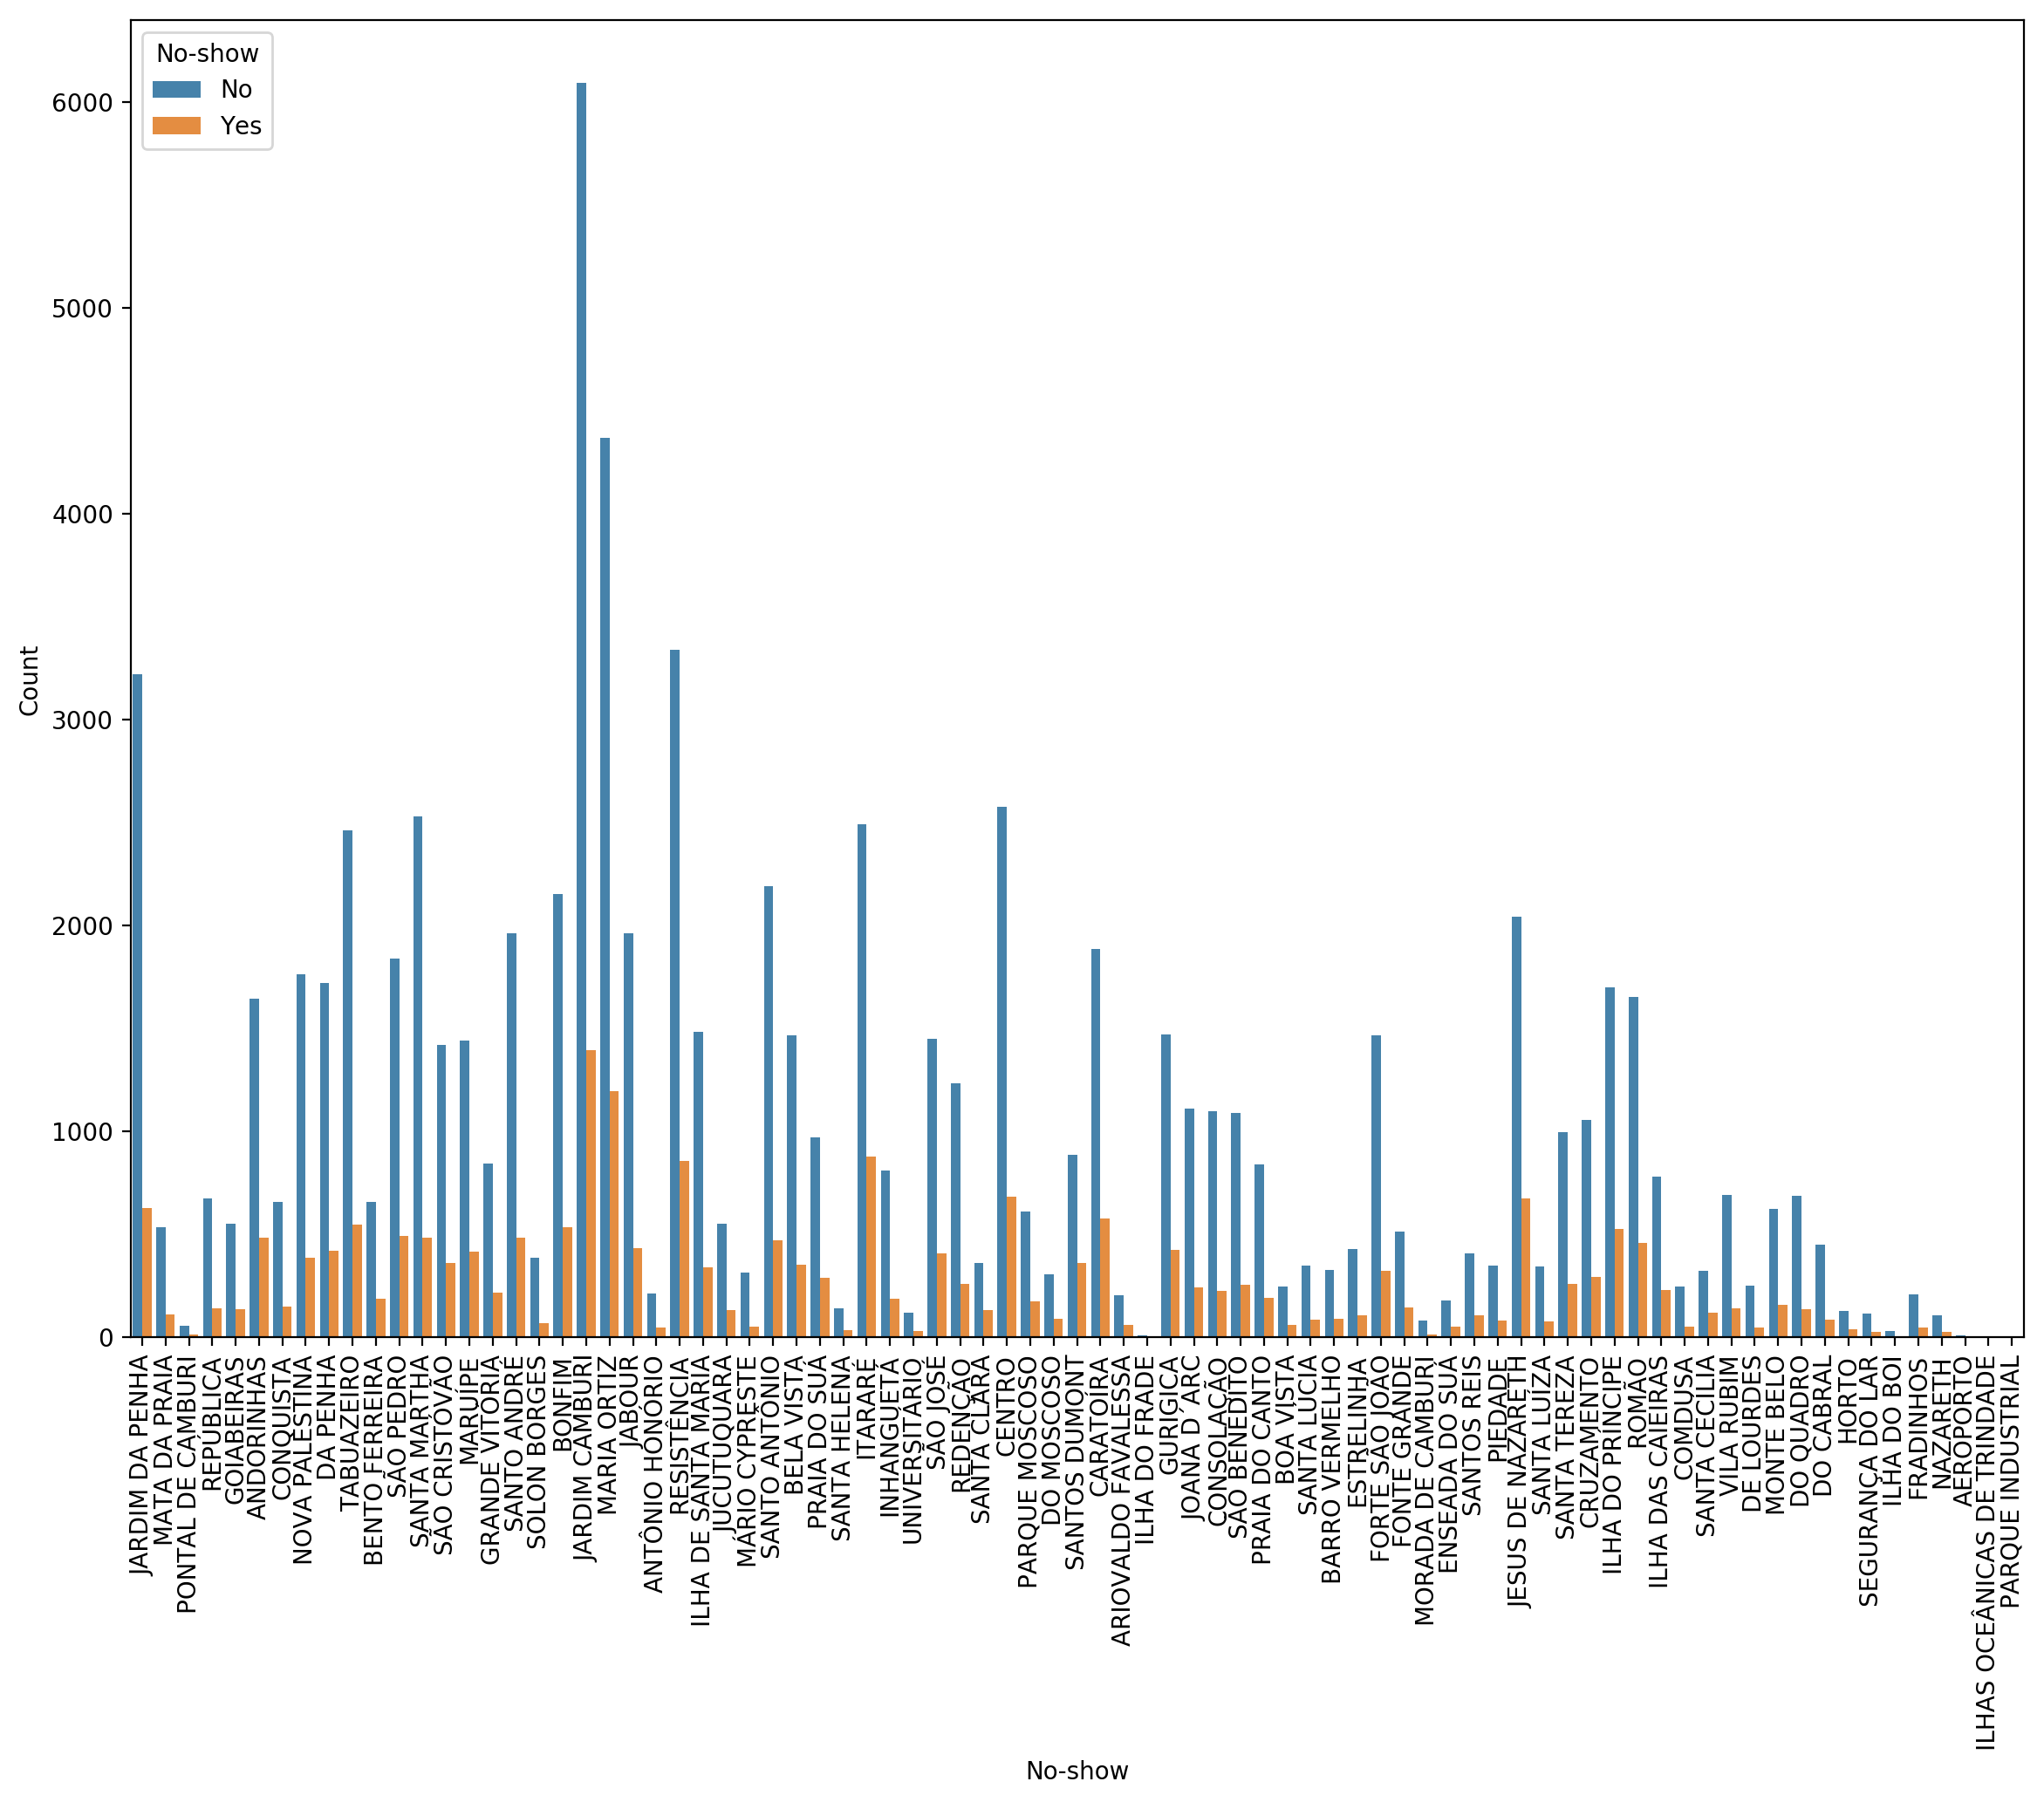

In [151]:
plt.figure(figsize=(14,10),dpi=200)
sns.countplot('Neighbourhood',hue="No-show",data=df_2,alpha=0.9)
plt.ylabel("Count");
plt.xlabel("No-show");
plt.xticks(rotation=90);

### How many patients who did rercive SMS and did not show up?

In [152]:
df_2[df_2['SMS_received']==1].count()['No-show']

34585

### How many patients who did not rercive SMS and did not show up?

In [153]:
df_2[df_2['SMS_received']==0].count()['No-show']

71776

In [154]:
df_2['No-show'].count()

106361

### Propotion of patients who did rercive SMS and did not show up!

In [155]:
print((df_2[df_2['SMS_received']==1].count()['No-show']/ df_2['No-show'].count()) * 100,'%' )

32.5166179333 %


### Propotion of patients who did not rercive SMS and did not show up!

In [156]:
print((df_2[df_2['SMS_received']==0].count()['No-show']/ df_2['No-show'].count()) * 100,'%')

67.4833820667 %


## Limitation:

#### 1- About 23715 patinets were under 18 years old, which they may do not have phone to get SMS messages as reminder for the appointment.
#### 2- Most of pateints who did show up and did not show up at the appointment were from JARDIM CAMBURI location compared to other locations.

## Conclusion:

### As shown above, we conclude that 67% of patients who did not show up at the appointment did not recive SMS. This means that recieving SMS has positive corrlation with showing up at the appointment. While only 33%of patients who did rercive SMS and did not show up.  And also, most of patients who did not show up were femal compared to men. In general, about 66 % of patients were femal, while only 34% were men. However, About 23715 patinets were under 18 years old, which they may do not have phone to get SMS messages as reminder for the appointment